In [210]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression

In [211]:
df = pd.read_csv('tel_churn.csv')
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0-1 year,tenure_group_1-2 years,tenure_group_2-3 years,tenure_group_3-4 years,tenure_group_4-5 years,tenure_group_5-6 years
0,0,0,29,29,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56,1889,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53,108,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42,1840,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70,151,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [212]:
df=df.drop('Unnamed: 0',axis=1)

In [213]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Churn',axis = 1)  # Features
y = df['Churn']  # Target variable

# Train-Test Split (80-20 or 70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [240]:
df.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'P

In [214]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7910447761194029
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



z:\Snehanshu\Projects\ML\Customer Churn Prediction\churn_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Due to low Accuracy We will use oversampling and Undersampling

In [215]:

# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

# Check class distribution after resampling
print(y_resampled.value_counts())


Churn
1    3117
0    2633
Name: count, dtype: int64


In [216]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [217]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [218]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9321739130434783
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       547
           1       0.92      0.96      0.94       603

    accuracy                           0.93      1150
   macro avg       0.93      0.93      0.93      1150
weighted avg       0.93      0.93      0.93      1150



In [219]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[496  51]
 [ 27 576]]


In [220]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Random Forest
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [221]:
from sklearn.metrics import confusion_matrix

models = {'Logistic Regression': y_pred, 'Random Forest': rf_pred, 'XGBoost': xgb_pred, 'SVM': svm_pred}

for name, pred in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))



Logistic Regression
Accuracy: 0.7910447761194029
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[923 110]
 [184 190]]

Random Forest
Accuracy: 0.7938877043354655
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.66      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[946  87]
 [203 171]]

XGBoost
Accuracy: 0.7725657427149965
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.

z:\Snehanshu\Projects\ML\Customer Churn Prediction\churn_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
z:\Snehanshu\Projects\ML\Customer Churn Prediction\churn_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
z:\Snehanshu\Projects\ML\Customer Churn Prediction\churn_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [222]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [223]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [224]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=10, min_samples_leaf=8)

In [225]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, random_state=100)

In [226]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [227]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [228]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9415807560137457
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       541
           1       0.94      0.95      0.95       623

    accuracy                           0.94      1164
   macro avg       0.94      0.94      0.94      1164
weighted avg       0.94      0.94      0.94      1164



In [229]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[505  36]
 [ 32 591]]


In [230]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)


Best parameters: {'max_depth': 10, 'n_estimators': 100}


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19704\1736360658.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette="viridis")


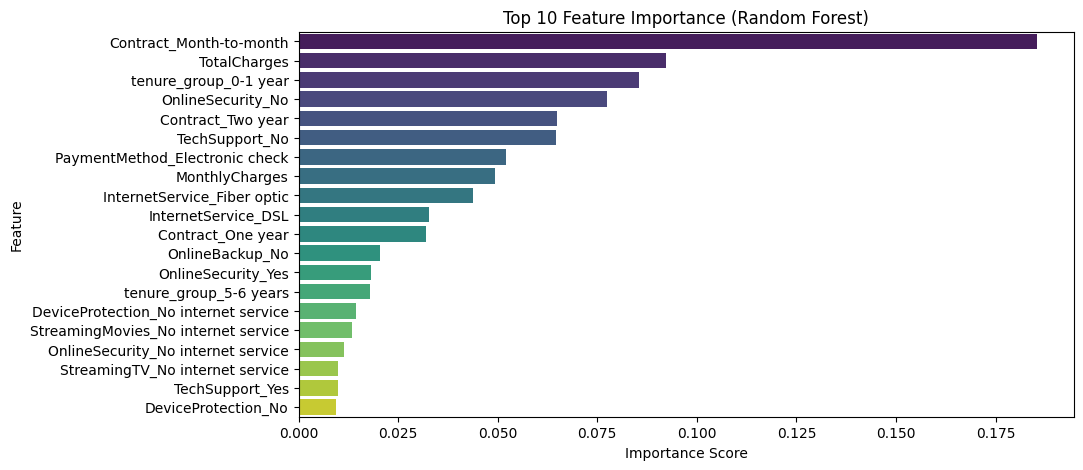

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance (for Random Forest)
feature_importance = rf.feature_importances_
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Select top 10 features
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette="viridis")
plt.title("Top 10 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [235]:
import pickle
filename = 'model.sav'
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [236]:
load_model = pickle.load(open(filename, 'rb'))
model_score_r1 = load_model.score(xr_test1, yr_test1)
model_score_r1

0.9415807560137457

In [1]:
import pickle

# Load the model
with open("model.sav", "rb") as file:
    model = pickle.load(file)

# Check attributes
if hasattr(model, "feature_names_in_"):
    print("Model Features:", model.feature_names_in_)
elif hasattr(model, "columns"):  # If it's a DataFrame or similar object
    print("Model Columns:", model.columns)
else:
    print("No attribute found for column names.")


Model Features: ['SeniorCitizen' 'MonthlyCharges' 'TotalCharges' 'gender_Female'
 'gender_Male' 'Partner_No' 'Partner_Yes' 'Dependents_No' 'Dependents_Yes'
 'PhoneService_No' 'PhoneService_Yes' 'MultipleLines_No'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_DSL' 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No' 'OnlineSecurity_No internet service'
 'OnlineSecurity_Yes' 'OnlineBackup_No' 'OnlineBackup_No internet service'
 'OnlineBackup_Yes' 'DeviceProtection_No'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No' 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No' 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No' 'StreamingMovies_No internet service'
 'StreamingMovies_Yes' 'Contract_Month-to-month' 'Contract_One year'
 'Contract_Two year' 'PaperlessBilling_No' 'PaperlessBilling_Yes'
 'PaymentMethod_Bank transfer (automatic)'
 'PaymentMethod_Credit card (automatic)' 'P